In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
laser=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/LBMM (1)/LBMM Supervised Learning.xlsx')

In [ ]:
laser.head()

,Scanning Speed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.0,1.00,1.0,2.973,0.184100,1.71
1,1.00,-1.0,-1.00,1.0,1.101,0.095160,1.02
2,0.00,0.0,-0.85,0.0,5.303,0.092300,1.08
3,-1.00,1.0,1.00,-1.0,0.387,0.145800,1.20
4,0.85,0.0,0.00,0.0,1.266,0.024789,1.02


**Exploratory Data Analysis**

In [ ]:
laser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Scanning Speed  31 non-null     float64
 1   Power           31 non-null     float64
 2   Frequency       31 non-null     float64
 3   Pitch           31 non-null     float64
 4   Ra              31 non-null     float64
 5   DOC             31 non-null     float64
 6   Time            31 non-null     float64
dtypes: float64(7)
memory usage: 1.8 KB


In [ ]:
laser.describe()

,Scanning Speed,Power,Frequency,Pitch,Ra,DOC,Time
count,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000
mean,0.000000,0.000000,-3.581365e-18,3.581365e-18,2.226255,0.043488,1.010458
std,0.762561,0.762561,7.625615e-01,7.625615e-01,1.425421,0.047912,0.292436
min,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,0.250000,0.003113,0.110000
25%,-0.925000,-0.925000,-9.250000e-01,-9.250000e-01,1.394400,0.007612,1.020000
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,2.221000,0.024789,1.070000
75%,0.925000,0.925000,9.250000e-01,9.250000e-01,2.875000,0.066645,1.176500
max,1.000000,1.000000,1.000000e+00,1.000000e+00,5.417000,0.184100,1.710000


In [ ]:
laser.isnull().sum()

Scanning Speed    0
Power             0
Frequency         0
Pitch             0
Ra                0
DOC               0
Time              0
dtype: int64

In [ ]:
laser1=laser.iloc[:,0:]
laser1

,Scanning Speed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.00,1.00,1.00,2.9730,0.184100,1.7100
1,1.00,-1.00,-1.00,1.00,1.1010,0.095160,1.0200
2,0.00,0.00,-0.85,0.00,5.3030,0.092300,1.0800
3,-1.00,1.00,1.00,-1.00,0.3870,0.145800,1.2000
4,0.85,0.00,0.00,0.00,1.2660,0.024789,1.0200
5,0.00,0.00,0.00,0.00,2.4590,0.027500,1.0800
6,0.00,0.00,0.00,0.00,2.4789,0.027400,1.1630
7,-1.00,-1.00,1.00,1.00,0.2500,0.109300,1.1900
8,0.00,0.00,0.00,0.00,2.4362,0.009265,1.0700
9,0.00,-0.85,0.00,0.00,0.3600,0.019770,1.0700


In [ ]:
laser1.describe()

,Scanning Speed,Power,Frequency,Pitch,Ra,DOC,Time
count,31.000000,31.000000,3.100000e+01,3.100000e+01,31.000000,31.000000,31.000000
mean,0.000000,0.000000,-3.581365e-18,3.581365e-18,2.226255,0.043488,1.010458
std,0.762561,0.762561,7.625615e-01,7.625615e-01,1.425421,0.047912,0.292436
min,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,0.250000,0.003113,0.110000
25%,-0.925000,-0.925000,-9.250000e-01,-9.250000e-01,1.394400,0.007612,1.020000
50%,0.000000,0.000000,0.000000e+00,0.000000e+00,2.221000,0.024789,1.070000
75%,0.925000,0.925000,9.250000e-01,9.250000e-01,2.875000,0.066645,1.176500
max,1.000000,1.000000,1.000000e+00,1.000000e+00,5.417000,0.184100,1.710000


In [ ]:
laser2 = laser1.rename({'Scanning Speed':'ScanningSpeed'},axis=1)
laser2

,ScanningSpeed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.00,1.00,1.00,2.9730,0.184100,1.7100
1,1.00,-1.00,-1.00,1.00,1.1010,0.095160,1.0200
2,0.00,0.00,-0.85,0.00,5.3030,0.092300,1.0800
3,-1.00,1.00,1.00,-1.00,0.3870,0.145800,1.2000
4,0.85,0.00,0.00,0.00,1.2660,0.024789,1.0200
5,0.00,0.00,0.00,0.00,2.4590,0.027500,1.0800
6,0.00,0.00,0.00,0.00,2.4789,0.027400,1.1630
7,-1.00,-1.00,1.00,1.00,0.2500,0.109300,1.1900
8,0.00,0.00,0.00,0.00,2.4362,0.009265,1.0700
9,0.00,-0.85,0.00,0.00,0.3600,0.019770,1.0700


**Correlation Analysis**

In [ ]:
laser2.corr()

,ScanningSpeed,Power,Frequency,Pitch,Ra,DOC,Time
ScanningSpeed,1.000000e+00,1.272827e-17,4.956069e-17,1.272827e-17,0.217936,-0.075069,-0.776181
Power,1.272827e-17,1.000000e+00,0.000000e+00,0.000000e+00,0.533009,0.150432,-0.127204
Frequency,4.956069e-17,0.000000e+00,1.000000e+00,-3.784670e-17,-0.565024,0.352828,-0.092601
Pitch,1.272827e-17,0.000000e+00,-3.784670e-17,1.000000e+00,0.011396,0.196423,0.180717
Ra,2.179364e-01,5.330085e-01,-5.650241e-01,1.139558e-02,1.000000,-0.022309,-0.102070
DOC,-7.506920e-02,1.504324e-01,3.528283e-01,1.964235e-01,-0.022309,1.000000,0.186135
Time,-7.761813e-01,-1.272044e-01,-9.260059e-02,1.807169e-01,-0.102070,0.186135,1.000000


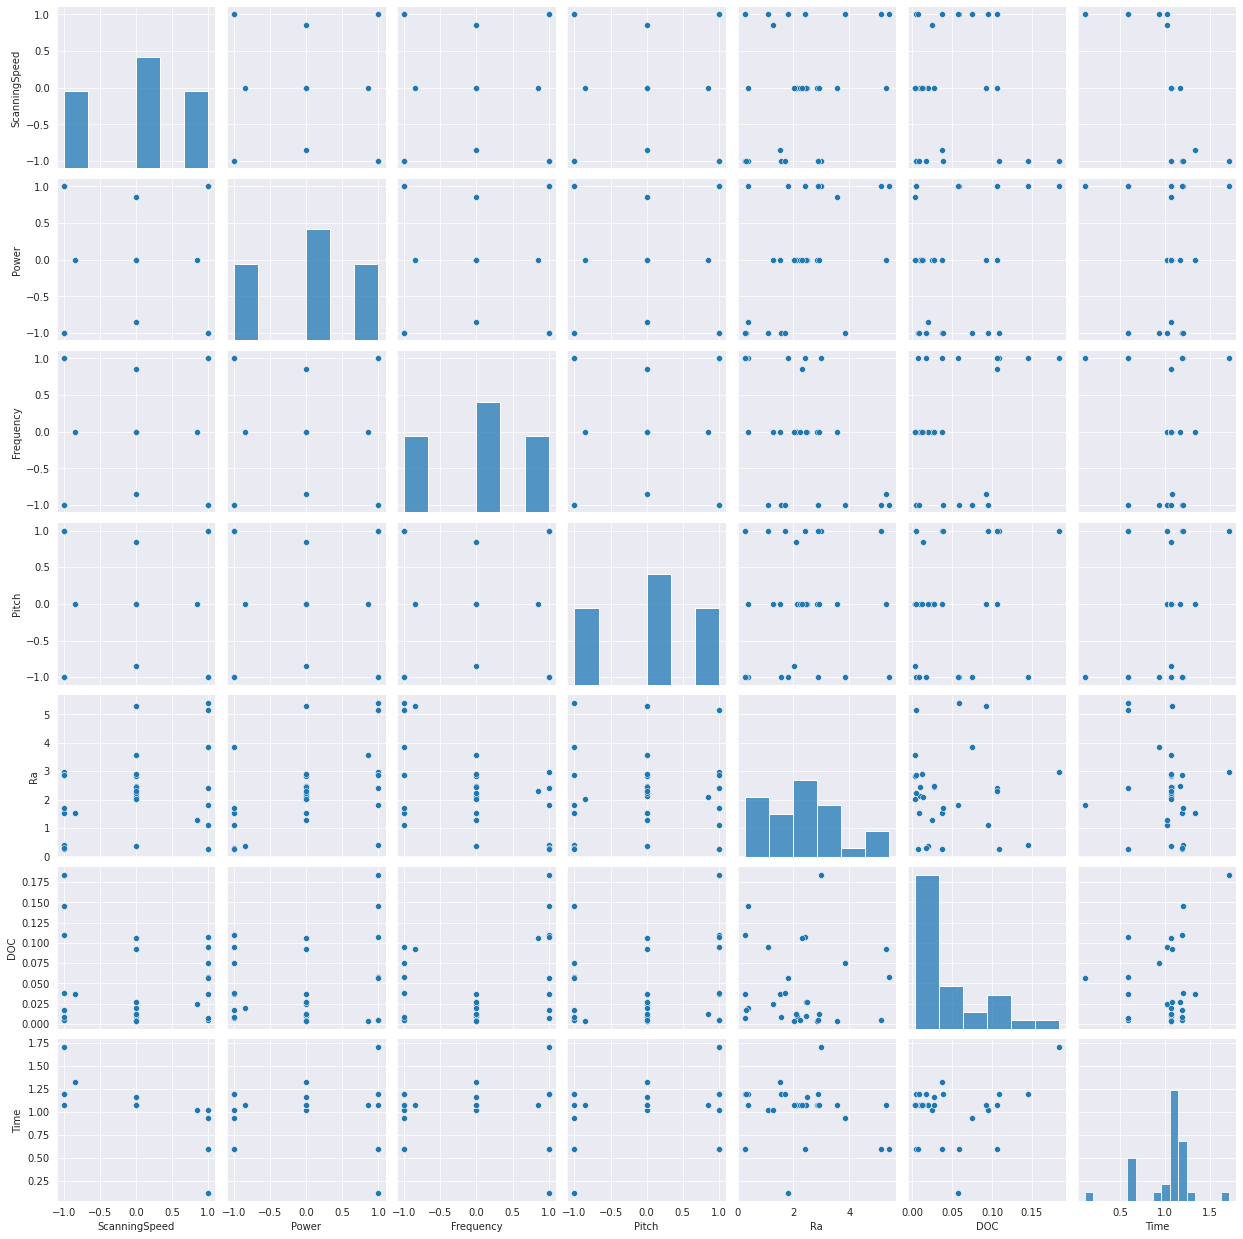

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(laser2)

**Model Building**

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [ ]:
laser2.columns

Index(['ScanningSpeed', 'Power', 'Frequency', 'Pitch', 'Ra', 'DOC', 'Time'], dtype='object')

In [ ]:
model = smf.ols('Ra~ScanningSpeed+Power+Frequency+Pitch+DOC+Time',data=laser2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     Ra   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     8.420
Date:                Sat, 16 Jul 2022   Prob (F-statistic):           5.60e-05
Time:                        15:08:01   Log-Likelihood:                -36.906
No. Observations:                  31   AIC:                             87.81
Df Residuals:                      24   BIC:                             97.85
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1421      0.997      1.145      0.263      -0.916       3.201
ScanningSpeed     0.7020      0.366      1.918      0.067      -0.053       1.457
Power             1.0133      0.227      4.455      0.000       0.544       1.483
Frequency        -1.0906      0.240     -4.540      0.000      -1.586      -0.595
Pitch            -0.0817      0.229     -0.357      0.724      -0.554       0.390
DOC               3.0589      3.986      0.767      0.450      -5.168      11.286
Time              0.9413      1.007      0.935      0.359      -1.137       3.020
==============================================================================
Omnibus:                        3.096   Durbin-Watson:                   2.712
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.732
Skew:                          -0.472   Prob(JB):                        0.421
Kurtosis:                       3.670   Cond. No.                         35.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Model Testing**

In [ ]:
## Finding the Coefficients
model.params

Intercept        1.142082
ScanningSpeed    0.701995
Power            1.013335
Frequency       -1.090557
Pitch           -0.081686
DOC              3.058892
Time             0.941305
dtype: float64

In [ ]:
## Finding the p values
print(model.tvalues,'\n',np.round(model.pvalues,5))

Intercept        1.145071
ScanningSpeed    1.917802
Power            4.454975
Frequency       -4.539532
Pitch           -0.357215
DOC              0.767398
Time             0.934780
dtype: float64 
 Intercept        0.26347
ScanningSpeed    0.06711
Power            0.00017
Frequency        0.00013
Pitch            0.72405
DOC              0.45033
Time             0.35921
dtype: float64


In [ ]:
## Finding the R2 values
model.rsquared,model.rsquared_adj

(0.6779354403814378, 0.5974193004767973)

In [ ]:
## Build MLR  models for insignificant parameters doors and CC
## Also find their t and p values

In [ ]:
mlr_cd = smf.ols('Ra~Power+Frequency',data=laser2).fit()
print(mlr_cd.tvalues,'\n',np.round(mlr_cd.pvalues,5))

Intercept    13.339124
Power         4.478263
Frequency    -4.747254
dtype: float64 
 Intercept    0.00000
Power        0.00012
Frequency    0.00006
dtype: float64


**Model Testing**

**1.Collinarity Check**

**2.Residual Analysis**

In [ ]:
## Collinearity Problem Check
## Calculation of VIF=1/(1-Rsquare) for all independent variables
rsq_DOC=smf.ols('DOC~ScanningSpeed+Power+Frequency+Pitch+Ra+Time',data=laser2).fit().rsquared
vif_DOC = 1/(1-rsq_DOC)
vif_DOC

1.370530500335182

In [ ]:
## Collinearity Problem Check
## Calculation of VIF=1/(1-Rsquare) for all independent variables
rsq_time=smf.ols('Time~ScanningSpeed+Power+Frequency+Pitch',data=laser2).fit().rsquared
vif_time = 1/(1-rsq_time)
vif_time

2.9400680389640033

In [ ]:
rsq_SS=smf.ols('ScanningSpeed~Time+Power+Frequency+Pitch',data=laser2).fit().rsquared
vif_SS = 1/(1-rsq_SS)
vif_SS

2.771265753201882

In [ ]:
rsq_power=smf.ols('Power~Time+ScanningSpeed+Frequency+Pitch',data=laser2).fit().rsquared
vif_power = 1/(1-rsq_power)
vif_power

1.047573094149324

In [ ]:
rsq_freq=smf.ols('Frequency~Time+ScanningSpeed+Power+Pitch',data=laser2).fit().rsquared
vif_freq = 1/(1-rsq_freq)
vif_freq

1.0252106997448238

In [ ]:
rsq_pitch=smf.ols('Pitch~Time+ScanningSpeed+Power+Frequency',data=laser2).fit().rsquared
vif_pitch = 1/(1-rsq_pitch)
vif_pitch

1.096018491867974

In [ ]:
## Put the values in Dataframe
d1={"Variables":pd.Series(['ScanningSpeed', 'Power', 'Frequency', 'Pitch']),"VIF":pd.Series([vif_SS,vif_power,vif_freq,vif_pitch])}
table_VIF = pd.DataFrame(d1)
table_VIF

,Variables,VIF
0,ScanningSpeed,2.771266
1,Power,1.047573
2,Frequency,1.025211
3,Pitch,1.096018


In [ ]:
a=min(table_VIF.VIF);table_VIF[table_VIF.VIF==a]   ### minimum VIF value

,Variables,VIF
2,Frequency,1.025211


In [ ]:
a=max(table_VIF.VIF);table_VIF[table_VIF.VIF==a]   ### maximmum VIF value

,Variables,VIF
0,ScanningSpeed,2.771266


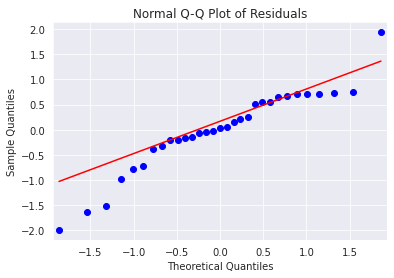

In [ ]:
## None of the VIF>10, No collinearity so consider all the variables in regression equation
## 2)Residual Analysis
## Test for Normality of Q-Q Plot using residual model (model.resid)
sm.qqplot(model.resid,line='q')  ## 'q'-A line is fit through the quantiles 
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [ ]:
list(np.where(model.resid>1))  ## Outliers detection from QQ plot of residuals

[array([2])]

In [ ]:
list(np.where(model.resid>-1))  ## Outliers detection from QQ plot of residuals

[array([ 0,  2,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
        20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])]

In [ ]:
## Test for Homoscedasticity or Heteroscedasticity(plotting model's standardized fitted value vs standardized residual values)
def standard_values(vals):
    return (vals-vals.mean())/vals.std()   ## User defined function for z

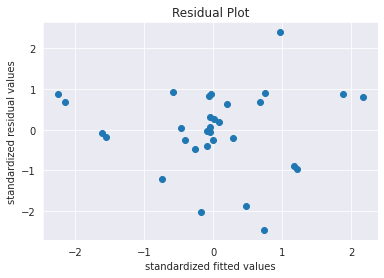

In [ ]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show()
## As scatter plot shows the constant variance so it posseses homoscedasticity

In [ ]:
## Test for errors or Residuals Vs Regressors or Independent 'x' variables or predictors
## Using Residual Regression plots code graphics.plot_regress_exog(model,'x',fig)    ##exog=x-variables & endog=y-variable
from statsmodels.graphics.regressionplots import influence_plot

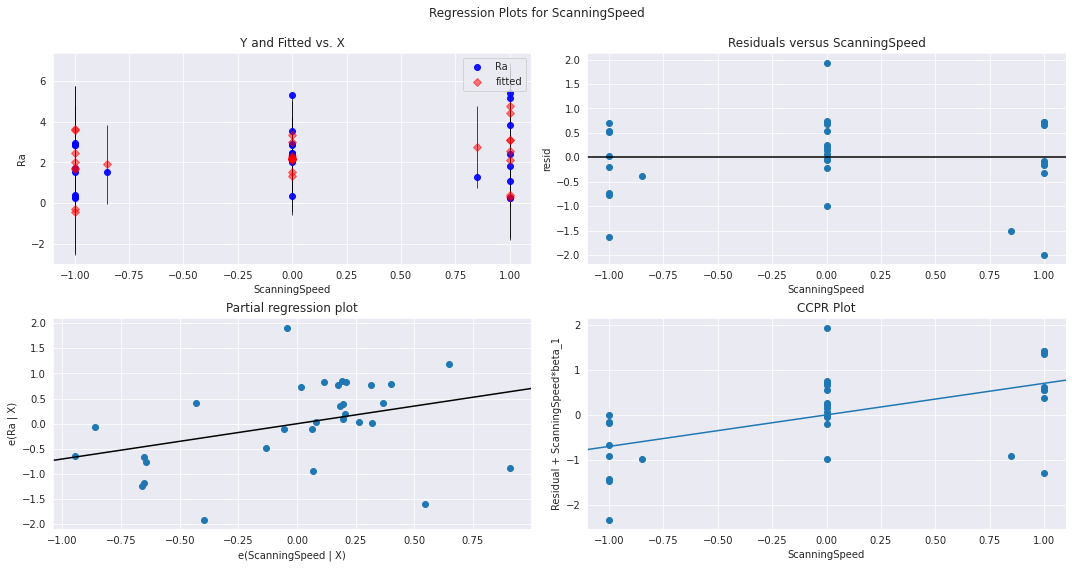

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ScanningSpeed',fig=fig)
plt.show()

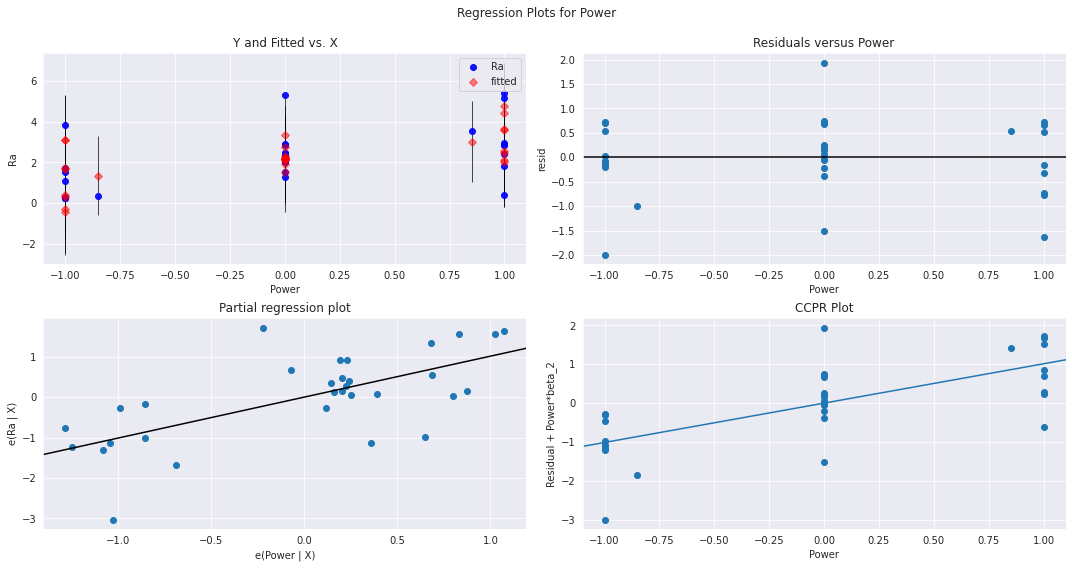

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Power',fig=fig)
plt.show()

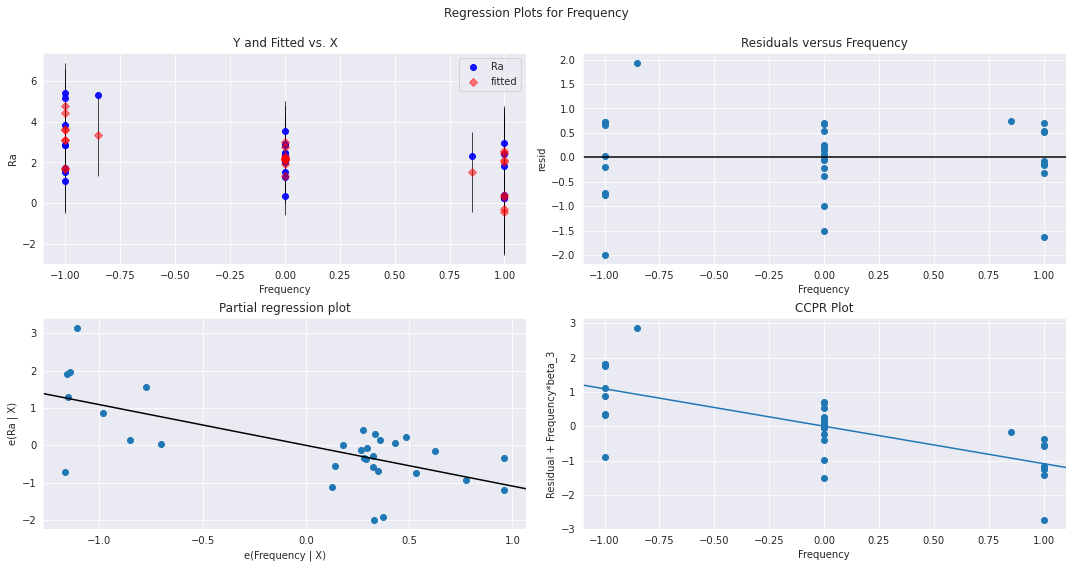

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Frequency',fig=fig)
plt.show()

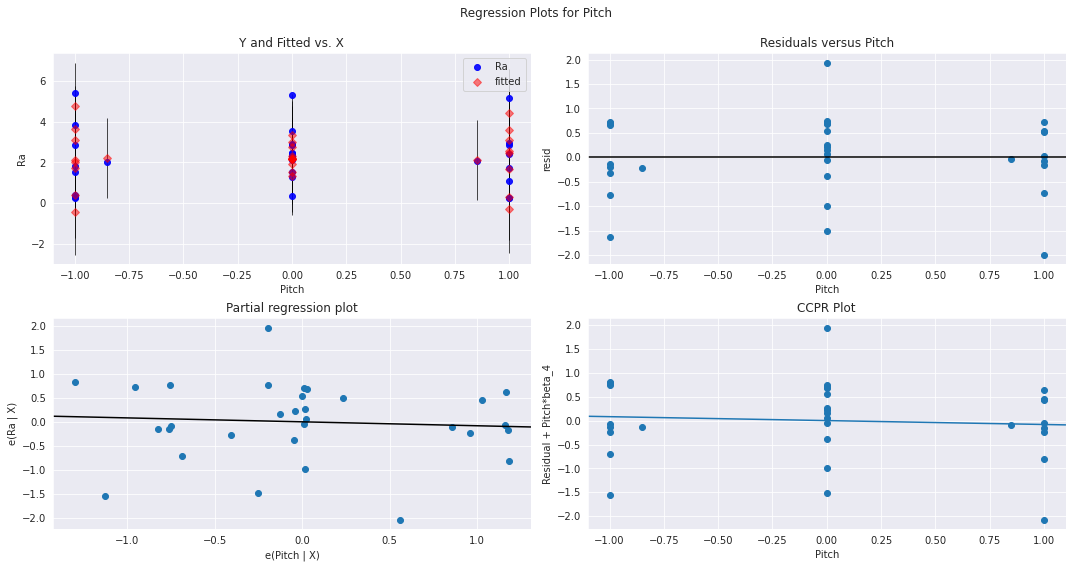

In [ ]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Pitch',fig=fig)
plt.show()

**Model Deletion Techniques(Checking Outliers and Influencers)**

**Two Techniques**

**1)Cook's Distance**

**2)Leverage Value**

In [ ]:
## Cook's distance : If Cook's distance is >1, then it's outlier
## Get the influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
print(np.round(c,3))

[0.118 0.647 0.145 0.444 0.101 0.    0.    0.044 0.001 0.016 0.003 0.048
 0.1   0.01  0.001 0.057 0.003 0.047 0.061 0.007 0.002 0.    0.    0.
 0.06  0.006 0.037 0.001 0.004 0.    0.014]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


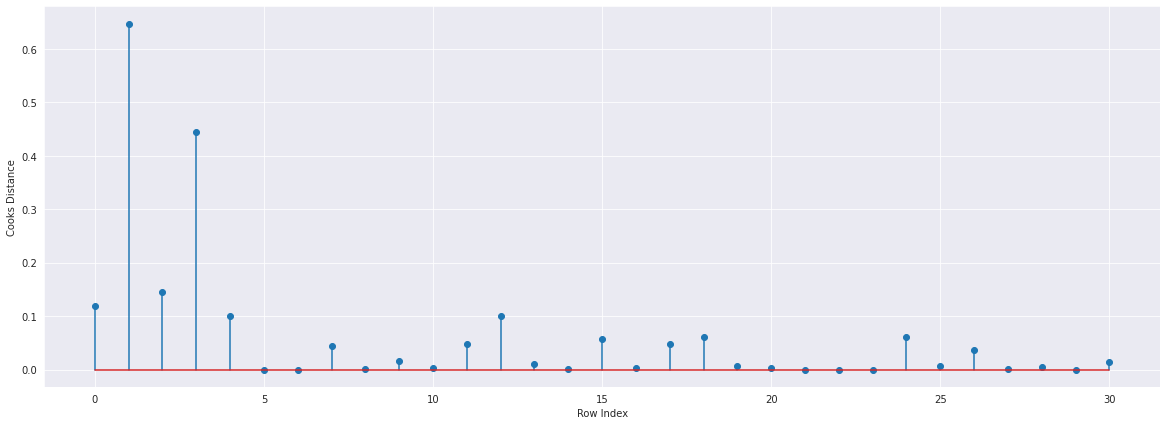

In [ ]:
## Plot the influencers using Stem Plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(laser2)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
## Index and value of influencer where c>0.5
np.argmax(c),np.max(c)

(1, 0.6471271245138355)

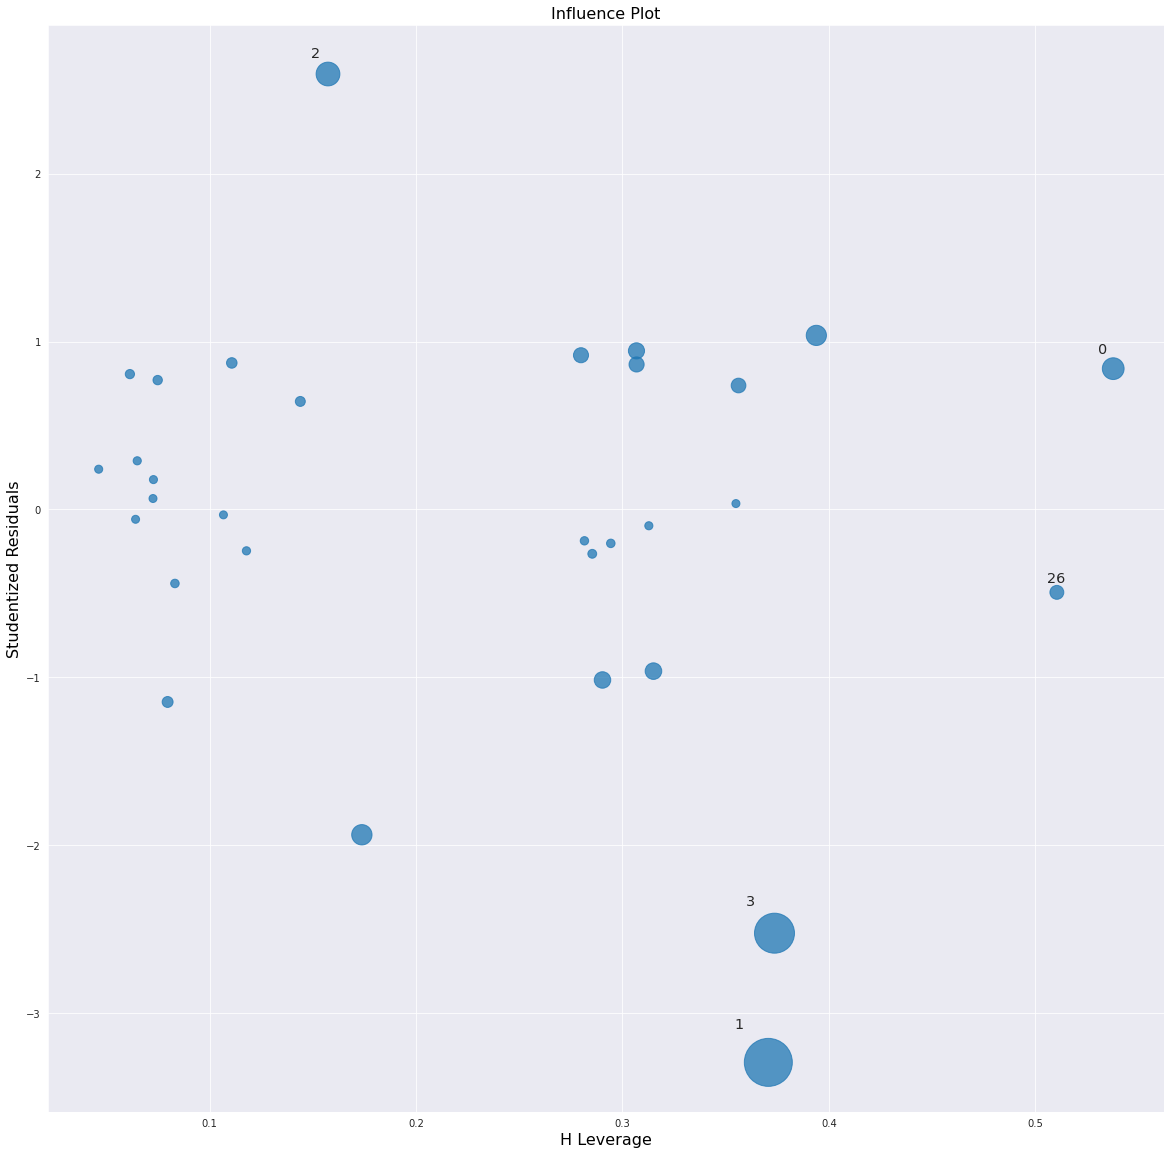

In [ ]:
##2.Leverage value using High Influence Points:Points beyond leverage cut_off value are influencers
fig,ax = plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax=ax)

In [ ]:
## Leverage Cutoff Value = 3*(k+1)/n; k= no.of features/columns and n=no.of datapoints
k=laser2.shape[1]
n=laser2.shape[0]
leverage_cutoff=(3*(k+1))/n
leverage_cutoff

0.7741935483870968

In [ ]:
laser2[laser2.index.isin([1])]

,ScanningSpeed,Power,Frequency,Pitch,Ra,DOC,Time
1,1.0,-1.0,-1.0,1.0,1.101,0.09516,1.02


**Improving the Model**

In [ ]:
## Creating the copy of data so that original data should not be affected
laser_new = laser2.copy()
laser_new

,ScanningSpeed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.00,1.00,1.00,2.9730,0.184100,1.7100
1,1.00,-1.00,-1.00,1.00,1.1010,0.095160,1.0200
2,0.00,0.00,-0.85,0.00,5.3030,0.092300,1.0800
3,-1.00,1.00,1.00,-1.00,0.3870,0.145800,1.2000
4,0.85,0.00,0.00,0.00,1.2660,0.024789,1.0200
5,0.00,0.00,0.00,0.00,2.4590,0.027500,1.0800
6,0.00,0.00,0.00,0.00,2.4789,0.027400,1.1630
7,-1.00,-1.00,1.00,1.00,0.2500,0.109300,1.1900
8,0.00,0.00,0.00,0.00,2.4362,0.009265,1.0700
9,0.00,-0.85,0.00,0.00,0.3600,0.019770,1.0700


In [ ]:
## Discard the datapoints which are influencers and reassign row number (reset_index(drop=True))
laser3 = laser_new.drop(laser_new.index[[1]],axis=0).reset_index(drop=True)
laser

,Scanning Speed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.00,1.00,1.00,2.9730,0.184100,1.7100
1,1.00,-1.00,-1.00,1.00,1.1010,0.095160,1.0200
2,0.00,0.00,-0.85,0.00,5.3030,0.092300,1.0800
3,-1.00,1.00,1.00,-1.00,0.3870,0.145800,1.2000
4,0.85,0.00,0.00,0.00,1.2660,0.024789,1.0200
5,0.00,0.00,0.00,0.00,2.4590,0.027500,1.0800
6,0.00,0.00,0.00,0.00,2.4789,0.027400,1.1630
7,-1.00,-1.00,1.00,1.00,0.2500,0.109300,1.1900
8,0.00,0.00,0.00,0.00,2.4362,0.009265,1.0700
9,0.00,-0.85,0.00,0.00,0.3600,0.019770,1.0700


**Model Deletion Diagnostics and Final Model**

In [ ]:
while np.max(c)>0.5:
  model=smf.ols('Ra~ScanningSpeed+Power+Frequency+Pitch+DOC+Time',data=laser3).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  laser3=laser3.drop(laser3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  laser3
else:
  final_model = smf.ols('Ra~ScanningSpeed+Power+Frequency+Pitch+DOC+Time',data=laser3).fit()
  final_model.rsquared,final_model.aic
  print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8138098879251205


In [ ]:
if np.max(c)>0.5:
  model=smf.ols('Ra~ScanningSpeed+Power+Frequency+Pitch+DOC+Time',data=laser3).fit()
  (c,_)=model.get_influence().cooks_distance
  c
  np.argmax(c),np.max(c)
  laser3=laser3.drop(laser3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  laser3
elif np.max(c)<0.5:  
  final_model = smf.ols('Ra~ScanningSpeed+Power+Frequency+Pitch+DOC+Time',data=laser3).fit()
  final_model.rsquared,final_model.aic
  print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8138098879251205


In [ ]:
laser3

,ScanningSpeed,Power,Frequency,Pitch,Ra,DOC,Time
0,-1.00,1.00,1.00,1.00,2.9730,0.184100,1.7100
1,0.00,0.00,-0.85,0.00,5.3030,0.092300,1.0800
2,0.85,0.00,0.00,0.00,1.2660,0.024789,1.0200
3,0.00,0.00,0.00,0.00,2.4590,0.027500,1.0800
4,0.00,0.00,0.00,0.00,2.4789,0.027400,1.1630
5,-1.00,-1.00,1.00,1.00,0.2500,0.109300,1.1900
6,0.00,0.00,0.00,0.00,2.4362,0.009265,1.0700
7,0.00,-0.85,0.00,0.00,0.3600,0.019770,1.0700
8,1.00,1.00,1.00,1.00,2.4110,0.106900,0.5900
9,1.00,1.00,-1.00,-1.00,5.4170,0.058200,0.5900


**Model Prediction**

In [ ]:
## data for new model prediction
new_data=pd.DataFrame({'ScanningSpeed':-1,'Power':0,'Frequency':-0.85,'Pitch':1,'DOC':0.18410,'Time':1.7100},index=[0])
new_data

,ScanningSpeed,Power,Frequency,Pitch,DOC,Time
0,-1,0,-0.85,1,0.1841,1.71


In [ ]:
## Manual Prediction of Ra
final_model.predict(new_data)

0    4.658333
dtype: float64

**Linear Regression**

In [ ]:
X = laser3.drop(['Ra'],axis=1)
y = laser3['Ra']

In [ ]:
X

,ScanningSpeed,Power,Frequency,Pitch,DOC,Time
0,-1.00,1.00,1.00,1.00,0.184100,1.7100
1,0.00,0.00,-0.85,0.00,0.092300,1.0800
2,0.85,0.00,0.00,0.00,0.024789,1.0200
3,0.00,0.00,0.00,0.00,0.027500,1.0800
4,0.00,0.00,0.00,0.00,0.027400,1.1630
5,-1.00,-1.00,1.00,1.00,0.109300,1.1900
6,0.00,0.00,0.00,0.00,0.009265,1.0700
7,0.00,-0.85,0.00,0.00,0.019770,1.0700
8,1.00,1.00,1.00,1.00,0.106900,0.5900
9,1.00,1.00,-1.00,-1.00,0.058200,0.5900


In [ ]:
y

0     2.9730
1     5.3030
2     1.2660
3     2.4590
4     2.4789
5     0.2500
6     2.4362
7     0.3600
8     2.4110
9     5.4170
10    3.8380
11    3.5670
12    0.2540
13    5.1500
14    1.5228
15    0.2990
16    2.8750
17    2.8350
18    0.2520
19    2.1270
20    2.0910
21    2.2210
22    2.8750
23    2.8970
24    1.8090
25    2.0150
26    1.5390
27    1.7090
28    2.2960
Name: Ra, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([3.05348163, 1.90172161, 2.12479273, 4.03136966, 2.74518215,
       2.26722658])

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [ ]:
print(score)

0.3931506534590058
